In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata

In [2]:
def get_dim(Im):
    """Takes an image as an input and gives dimensions for pixels (width and height)"""
    width, height = Image.open(Im).size
    return (width,height)
def get_xy(Im):
    """Take an image and return all possible x,y coordinate combinations"""
    width, height = Image.open(Im).size
    return list(product(np.arange(width),np.arange(height)))
def get_rgb(Im):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(Im) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in get_xy(Im)]
    return rgb
def get_data(Im):
    """Take an image and extract all the coordinates and RGB values of each pixel. Returns a data frame 
    containing that information"""
    img_data = list(zip(get_xy(Im),get_rgb(Im)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)
def resize(Im,size,name):
    """Take an image and resize it. Takes the original Image Im as input, and resizes to the size specified and 
    outputs a new image with name chosen"""
    image = Image.open(Im)
    new_image = image.resize(size)
    new_image.save(name)

In [3]:
def inspect(cluster):
    """This function is dependent on the code block above. View all the pixels in a specific cluster
    derived from k-means"""
    ind = df.loc[df['Cluster'] != cluster,['x','y']]
    im = Image.open('RED.png')
    pix = im.load()
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = (0,0,0)
    return im
def recolor(Im,cluster,color):   
    im = Image.open(Im) 
    pix = im.load()
    ind = df.loc[df['Cluster'] == cluster,['x','y']]
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = color
    return im
def clust_recolor(Im,cluster,color):   
    ind = df.loc[df['Cluster'] == cluster,['x','y']]
    c = np.asarray(inspect(cluster))
    d = np.copy(c)
    color = np.array(color)
    color = np.append(color, 255)
    for i,j in zip(list(ind['x']),list(ind['y'])):
        d[j,i] = color
    new = np.zeros((750, 750, 3), dtype = np.int16)
    for i in range(len(d)):
        for j in range(len(d[i])):
            new[i,j] = np.delete(d[i,j], -1, 0)
    return new

In [76]:
df = get_data('RED.png')
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]

In [77]:
im = Image.open('RED.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('RedS.png')

In [78]:
df = get_data('RedS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df), method = 'average')

In [79]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 6,criterion = 'maxclust', method = 'average')
dfo = get_data('RedS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [80]:
clusts = list(set(df['Cluster'].values))
cluster = [inspect(i) for i in clusts]

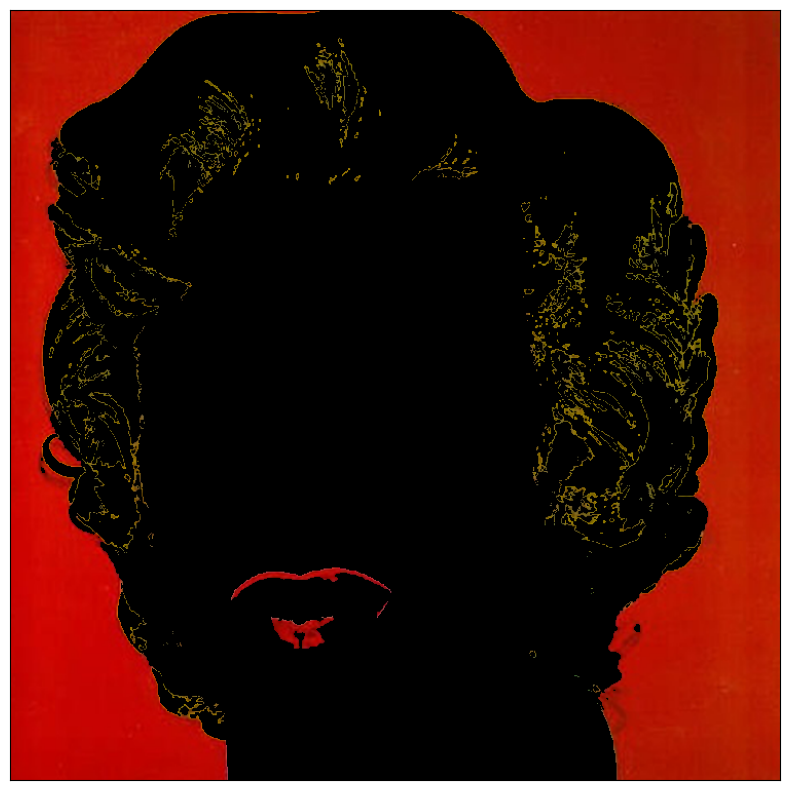

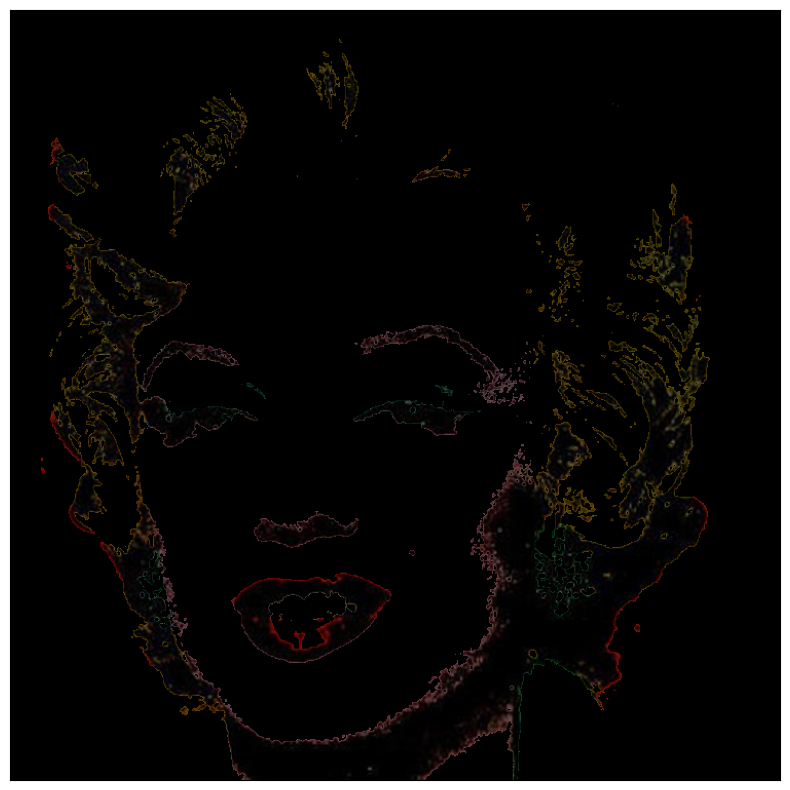

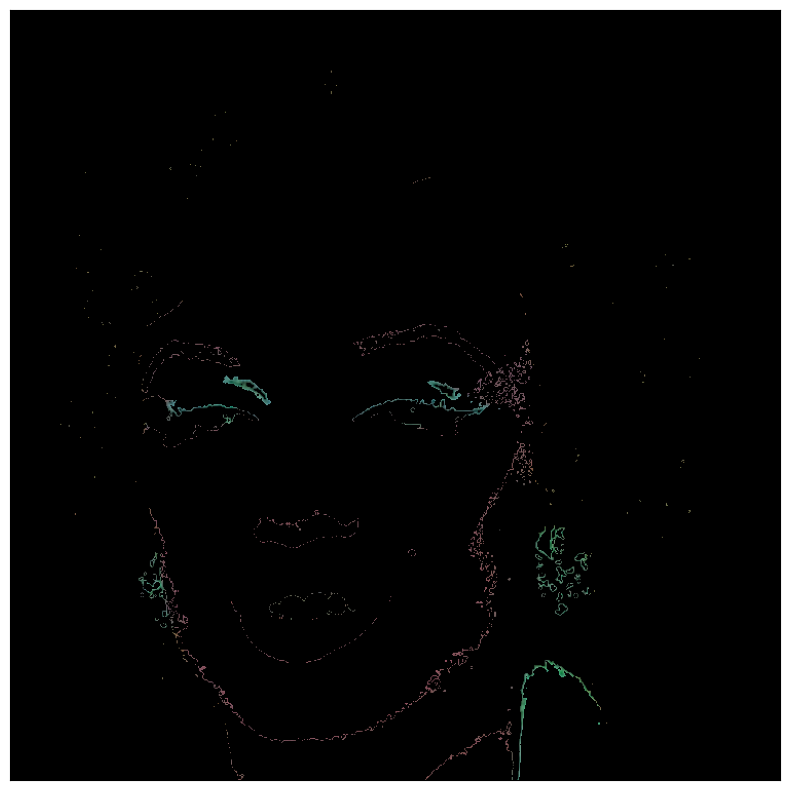

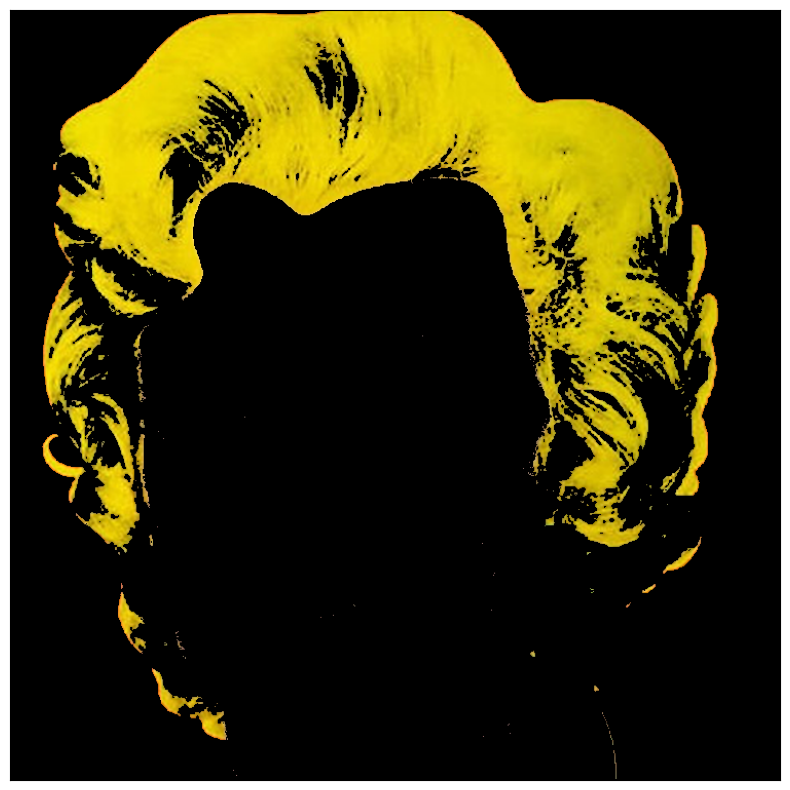

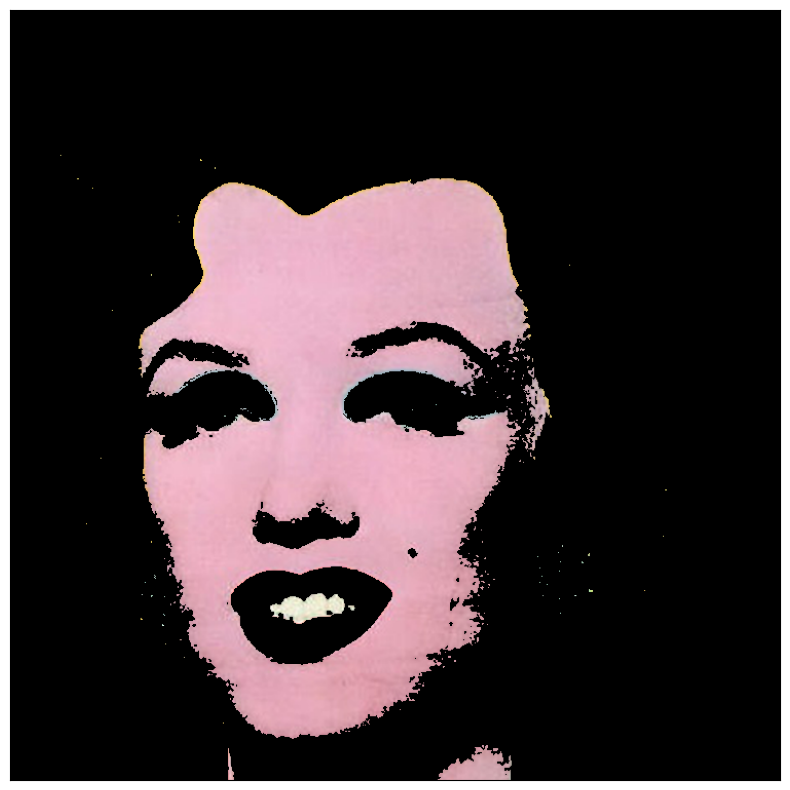

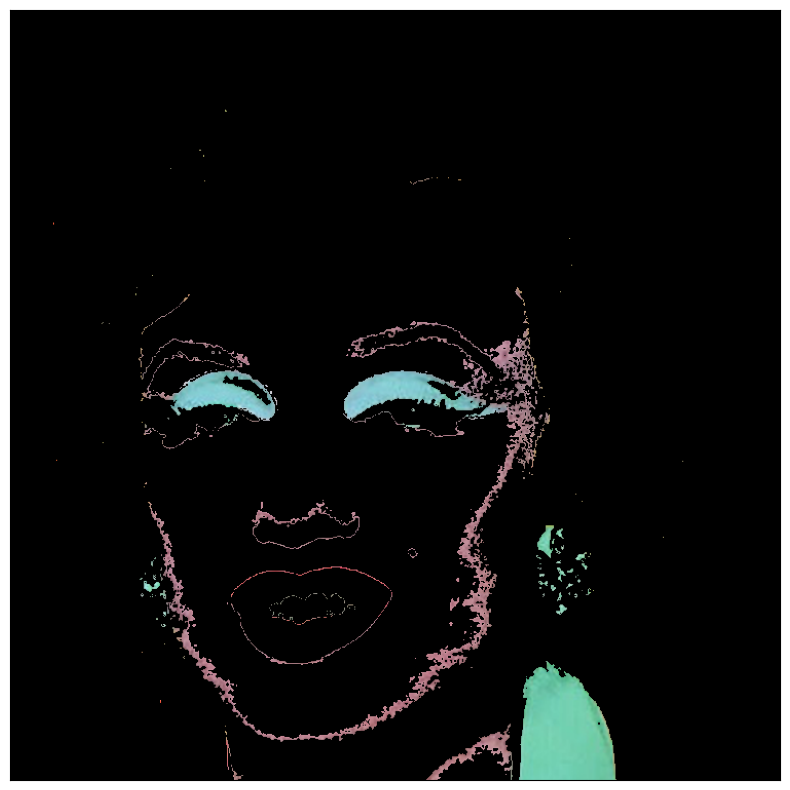

In [81]:
for i in clusts:
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.imshow(np.asarray(inspect(i)))

    # Hide X and Y axes label marks
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
    ax.set_xticks([])
    ax.set_yticks([])

In [10]:
lay_1 = clust_recolor('RED.png', 1, (172, 30, 30))

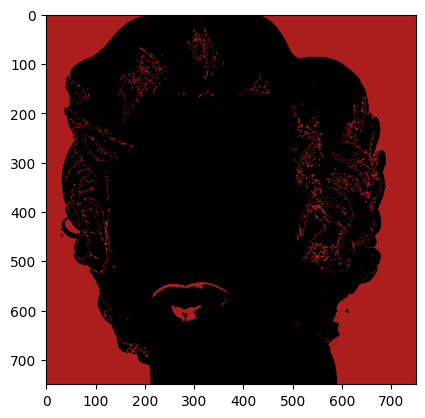

In [11]:
plt.imshow(lay_1)

In [36]:
lay_2 = clust_recolor('RED.png', 2, (108, 85, 67))

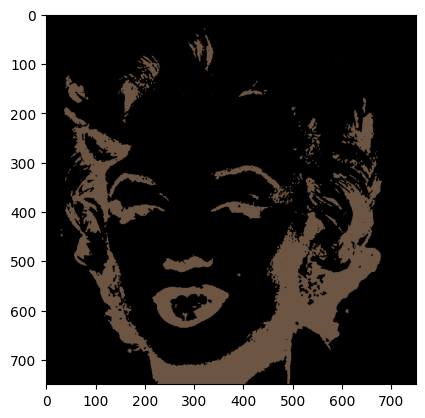

In [37]:
plt.imshow(lay_2)

In [52]:
lay_3 = clust_recolor('RED.png', 2, (0, 0, 0))

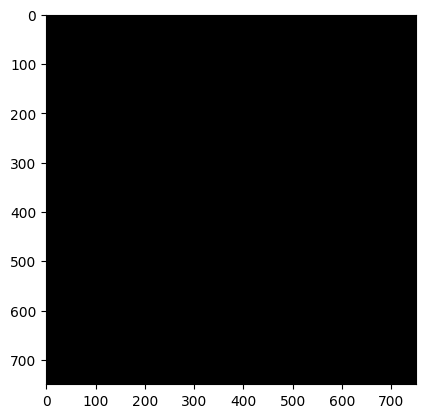

In [53]:
plt.imshow(lay_3)

In [16]:
lay_4 = clust_recolor('RED.png', 4, (241,204,143))

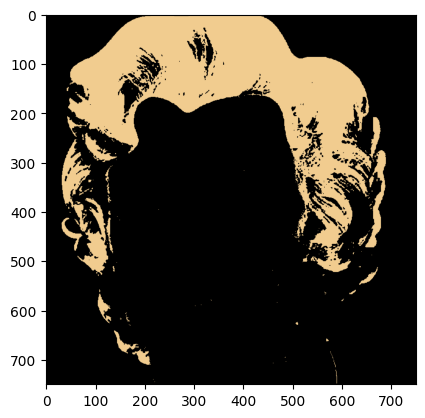

In [17]:
plt.imshow(lay_4)

In [18]:
lay_5 = clust_recolor('RED.png', 5, (229, 181, 161))

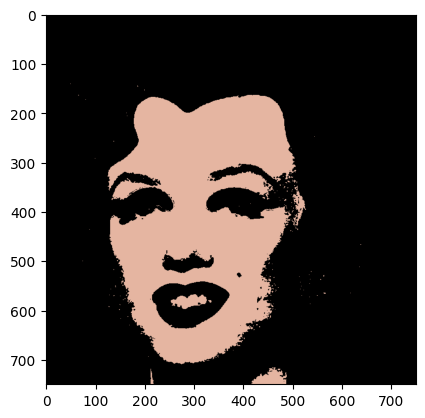

In [19]:
plt.imshow(lay_5)

In [22]:
lay_6 = clust_recolor('RED.png', 6, (255, 153, 153))

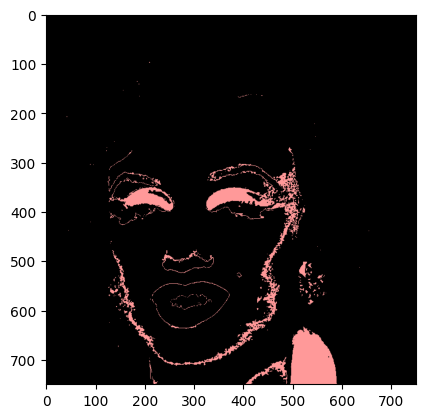

In [23]:
plt.imshow(lay_6)

In [54]:
recol = lay_1 + lay_2 + lay_3 + lay_4 + lay_5 + lay_6

[]

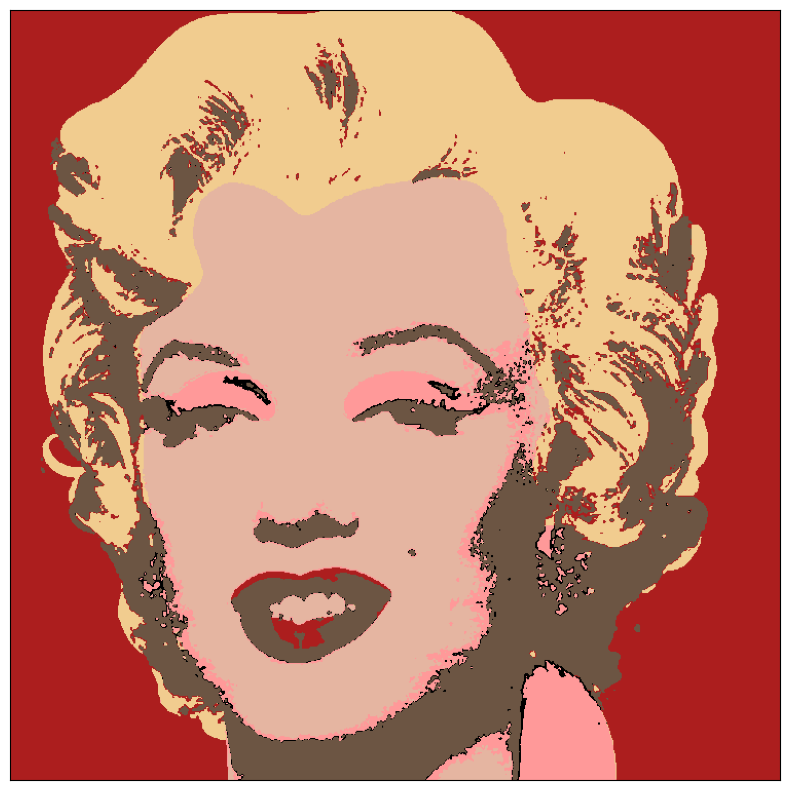

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(recol)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])

In [82]:
unnat_1 = clust_recolor('RED.png', 1, (145, 20, 20))

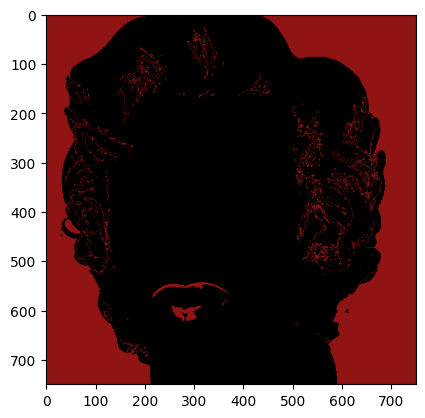

In [83]:
plt.imshow(unnat_1)

In [84]:
unnat_2 = clust_recolor('RED.png', 2, (108, 85, 67))

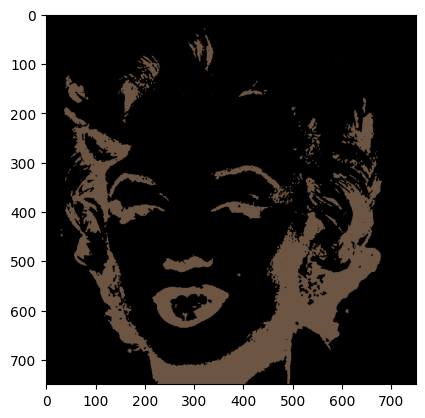

In [85]:
plt.imshow(unnat_2)

In [96]:
unnat_3 = clust_recolor('RED.png', 3, (60, 60, 60))

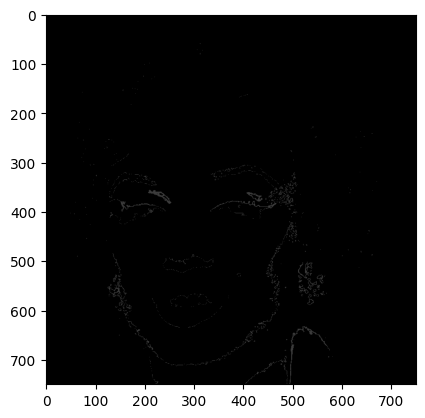

In [97]:
plt.imshow(unnat_3)

In [90]:
unnat_4 = clust_recolor('RED.png', 4, (137, 101, 60))

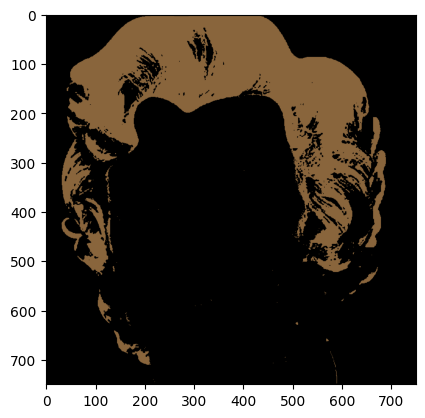

In [91]:
plt.imshow(unnat_4)

In [92]:
unnat_5 = clust_recolor('RED.png', 5, (226, 203, 156))

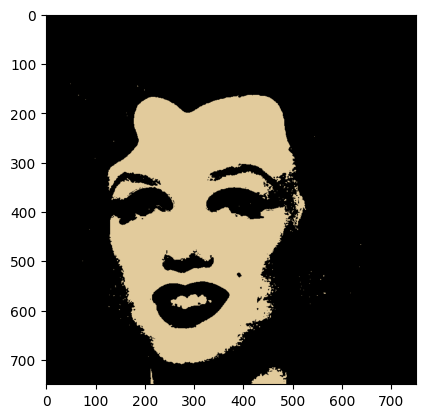

In [105]:
plt.imshow(unnat_5)

In [106]:
unnat_6 = clust_recolor('RED.png', 6, (193, 108, 72))

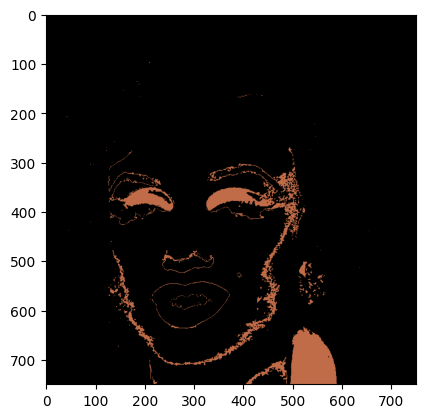

In [107]:
plt.imshow(unnat_6)

In [108]:
unnat = unnat_1 + unnat_2 + unnat_3 + unnat_4 + unnat_5 + unnat_6

[]

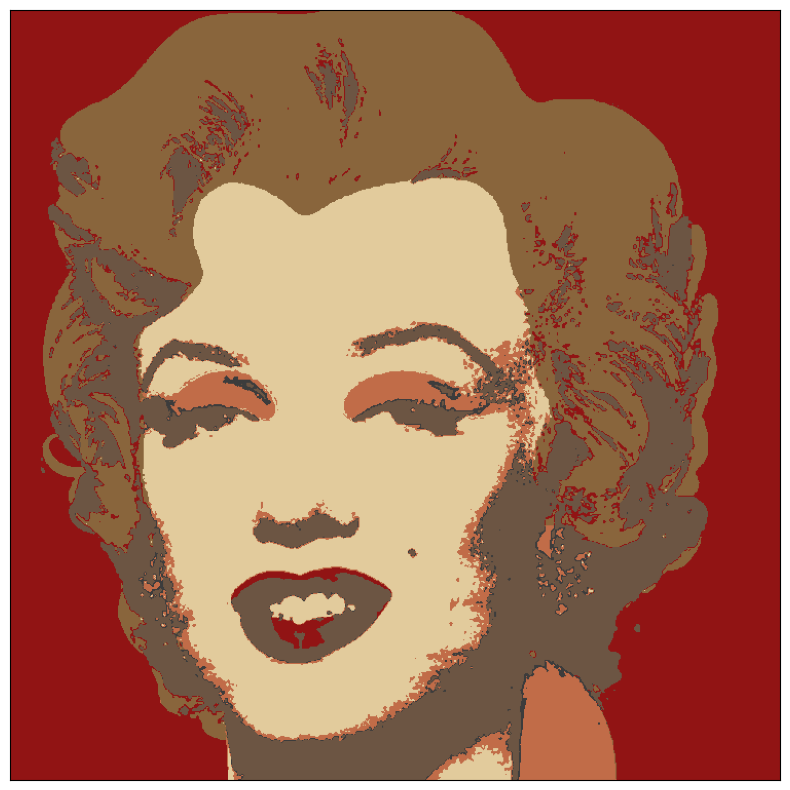

In [109]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(unnat)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])